In [1]:
# Using Thomas algorithm to solve the linear BVP
import sys
import numpy as np
import matplotlib.pyplot as plt


def thomas_algorithm(a, b, c, d):
    """
    Solves the Tridiagonal Linear System
          --             -- -- --   -- --
          |b_1 c_1        | |f_1|   |d_1|
          |a_2 b_2 c_2    | | . |   | . |
          |    a_3 . . .  | | . | = | . |
          |               | |   |   |   |
          |               | |   |   |   |
          |       a_n b_n | |f_n|   |d_n|
          --             -- -- --   -- --
    """
    assert len(a) == len(b) == len(c) == len(d)
    N = len(c)
    c_ = [None for i in range(N)]
    d_ = [None for i in range(N)]
    f = [None for i in range(N)]
    c_[0] = c[0]/b[0]
    d_[0] = d[0]/b[0]

    for i in range(1, N):
        c_[i] = c[i]/(b[i] - a[i]*c_[i-1])
        d_[i] = (d[i] - a[i]*d_[i-1])/(b[i] - a[i]*c_[i-1])

    f[N-1] = d_[N-1]
    for i in range(N-2, -1, -1):
        f[i] = d_[i] - c_[i]*f[i+1]

    return f


In [67]:
def eval_y2(y, h) :
    return [0 for i in range(1, len(y)-1)]

def eval_y1(y, h) :
    return [(y[i] - y[i-1])/(h) for i in range(1, len(y)-1)]

def eval_y(y_init, h) :
    return y_init[1:-1]
    
def evalF(B, D, F) :
    return [(D[i] - F[i]**2) for i in range(len(B))]

def eval_part_y2(B, D, F) :
    return [0 for i in range(len(B))] 

def eval_part_y1(B, D, F) :
    return [1 for i in range(len(B))]

def eval_part_y(B, D, F) :
    return [(- 2*F[i]) for i in range(len(B))]


def Quasi(initial_cond, final_cond, h):
    
    l, y_l = initial_cond
    r, y_r = final_cond
    N = (r - l)/h
    N = int(N)

    X = np.linspace(l, r, (1/h)+1)
    y_init = [ (((x-l)**2)*y_r + ((r-x)**2)*y_l)/(r-l) for x in X]
    B = eval_y2(y_init,h)
    D = eval_y1(y_init,h)
    F = eval_y(y_init,h)
    A = evalF(B, D, F)
    C = eval_part_y2(B, D, F)
    E = eval_part_y1(B, D, F)
    G = eval_part_y(B, D, F)
    
    loop = 0
    while True :
        loop+=1
        
        a = [None for i in X[1:-1]]
        b = [None for i in X[1:-1]]
        c = [None for i in X[1:-1]]
        d = [None for i in X[1:-1]]
        
        for i in range(len(a)):
            a[i] = C[i]/(h**2) - E[i]/h
            b[i] = (-2*C[i]/(h**2) + E[i]/h + G[i])
            c[i] = C[i]/(h**2)
            d[i] = B[i]*C[i] + D[i]*E[i] + F[i]*G[i] - A[i]

        d[0] -= y_l*a[0]
        d[-1] -= y_r*c[-1]

        f = [y_l] + thomas_algorithm(a, b, c, d) + [y_r]
        y_init = f
        y_l = y_init[0]
        y_r = y_init[-1]
        %matplotlib inline
        plt.plot(f)
        B = eval_y2(y_init,h)
        D = eval_y1(y_init,h)
        F = eval_y(y_init,h)
        A = evalF(B, D, F)
        C = eval_part_y2(B, D, F)
        E = eval_part_y1(B, D, F)
        G = eval_part_y(B, D, F)
#         print len(A), len(B), len(C), len(D), len(E), len(F), len(G)

        if( loop > 15) :
            break
        
    return X, f

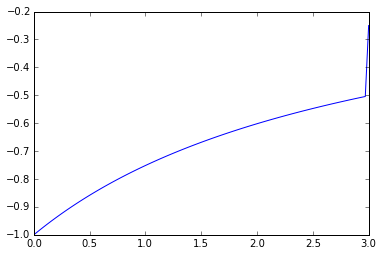

In [70]:
X, f = Quasi((0, -1), (3, -0.25), 0.01)
%matplotlib inline
plt.plot(X,f)